# Homework 5

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

### Parameters and Utility function

In [2]:
# 3-5-5-5-3 kernel
kernel = [[-2, -1], [-2, 0], [-2, 1],
[-1, -2], [-1, -1], [-1, 0], [-1, 1], [-1, 2],
[ 0, -2], [ 0, -1], [ 0, 0], [ 0, 1], [ 0, 2],
[ 1, -2], [ 1, -1], [ 1, 0], [ 1, 1], [ 1, 2],
          [ 2, -1], [ 2, 0], [ 2, 1]]

In [3]:
def valid(indices, shape):
    return (indices[0] >= 0 and indices[0] < shape[0] and 
            indices[1] >= 0 and indices[1] < shape[1])

### Original image

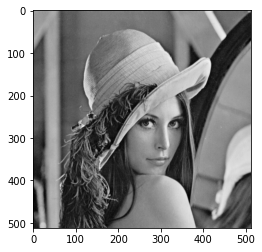

In [4]:
img = cv2.imread('lena.bmp', cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')
plt.show()

### Dilation

In [5]:
def template_func(in_img, out_img, kernel, func):
    n_rows, n_cols = in_img.shape
    condition = 255 if dilation else 0
        
    for i in range(n_rows):
        for j in range(n_cols):
            for k in kernel:
                u, v = k
                func(in_img, out_img, i, j, u, v)
    
    return out_img

In [6]:
def dilation(img, kernel):
    dilated_img = np.zeros(img.shape, dtype=int)
    def dilation_func(in_img, out_img, i, j, u, v):
        if valid((i+u, j+v), in_img.shape):
            out_img[i, j] = max(out_img[i, j], in_img[i+u, j+v])
    return template_func(img, dilated_img, kernel, dilation_func)

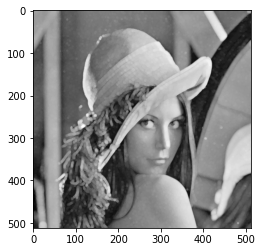

In [7]:
dilated_img = dilation(img, kernel)
plt.imshow(dilated_img, cmap='gray')
plt.show()

### Erosion

In [8]:
def erosion(img, kernel):
    eroded_img = np.ones(img.shape, dtype=int) * 255
    def erosion_func(in_img, out_img, i, j, u, v):
        if valid((i+u, j+v), in_img.shape):
            out_img[i, j] = min(out_img[i, j], in_img[i+u, j+v])
    return template_func(img, eroded_img, kernel, erosion_func)

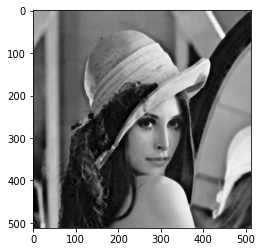

In [9]:
eroded_img = erosion(img, kernel)
plt.imshow(eroded_img, cmap='gray')
plt.show()

### Opening

In [10]:
def opening(img, kernel):
    return dilation(erosion(img, kernel), kernel)

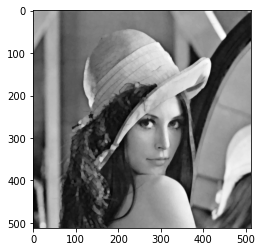

In [11]:
opening_img = opening(img, kernel)
plt.imshow(opening_img, cmap='gray')
plt.show()

### Closing

In [12]:
def closing(img, kernel):
    return erosion(dilation(img, kernel), kernel)

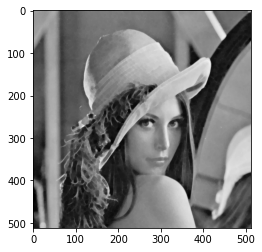

In [13]:
closing_img = closing(img, kernel)
plt.imshow(closing_img, cmap='gray')
plt.show()